# Sub-daily data
NeuralProphet can make forecasts for time series with sub-daily observations by passing in a dataframe with timestamps in the ds column. The format of the timestamps should be `YYYY-MM-DD HH:MM:SS` - see the example csv [here](https://github.com/ourownstory/neural_prophet/blob/master/example_data/yosemite_temps.csv). When sub-daily data are used, daily seasonality will automatically be fit. Here we fit NeuralProphet to data with 5-minute resolution (daily temperatures at Yosemite):

In [1]:
import pandas as pd
from neuralprophet import NeuralProphet
df = pd.read_csv('../example_data/yosemite_temps.csv')

In [2]:
m = NeuralProphet(log_level="ERROR")
metrics = m.fit(df, freq='5M')
metrics

,SmoothL1Loss,MAE,RegLoss
0,0.122403,19.421448,0.0
1,0.008142,6.088099,0.0
2,0.009292,6.526187,0.0
3,0.007576,5.877911,0.0
4,0.006567,5.363456,0.0
5,0.005372,4.810364,0.0


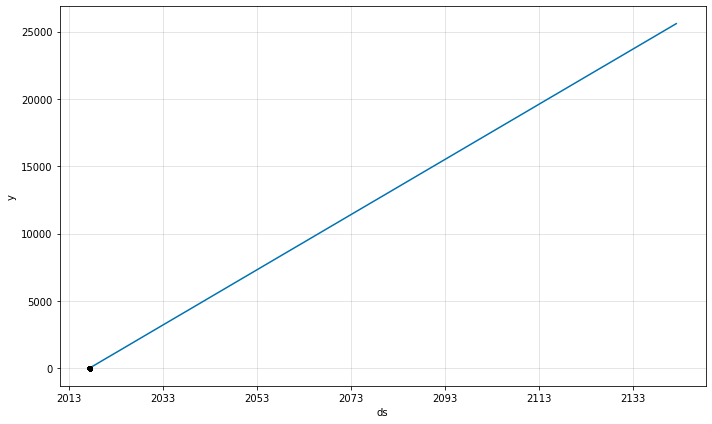

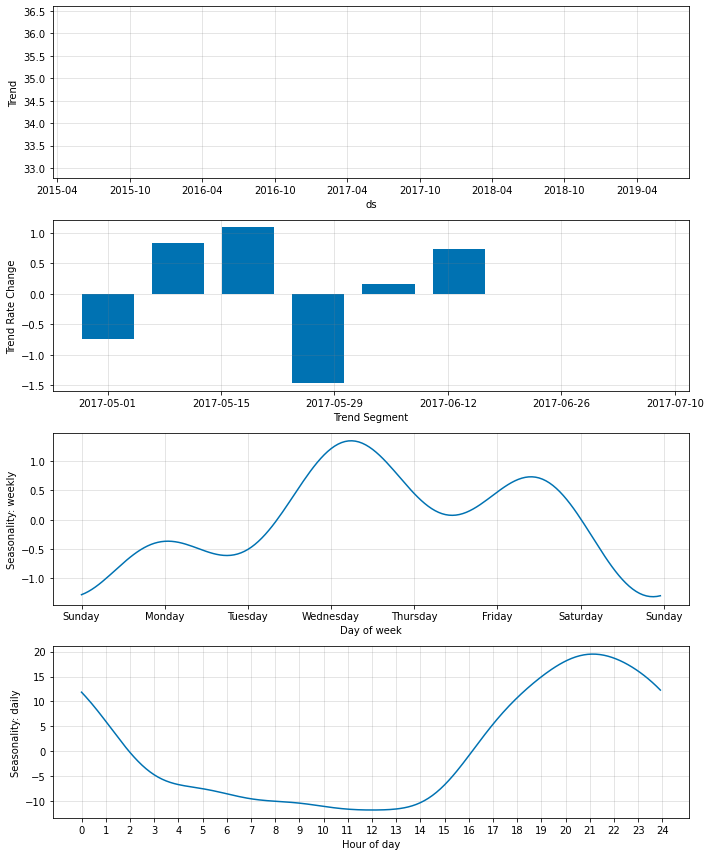

In [3]:
future = m.make_future_dataframe(df, periods=300, n_historic_predictions=len(df))
forecast = m.predict(future)
fig = m.plot(forecast)
# fig_comp = m.plot_components(forecast)
fig_param = m.plot_parameters()